In [1]:
!pip install pycaret

In [2]:
from pycaret.regression import RegressionExperiment
import pandas as pd
data = pd.read_csv(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\raw_data\raindata.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
print(data.dtypes)
data

T2M                   float64
RH2M                  float64
WS10M                 float64
PRECTOTCORR           float64
WSC                   float64
DATE           datetime64[ns]
dtype: object


,T2M,RH2M,WS10M,PRECTOTCORR,WSC,DATE
0,23.51,92.91,1.94,0.00,1.28,2021-03-16 00:00:00
1,23.31,93.30,1.69,0.00,1.14,2021-03-16 01:00:00
2,23.08,93.99,1.57,0.00,1.07,2021-03-16 02:00:00
3,22.82,94.89,1.62,0.00,1.10,2021-03-16 03:00:00
4,22.54,96.13,1.76,0.00,1.22,2021-03-16 04:00:00
...,...,...,...,...,...,...
29816,25.87,90.32,1.96,0.42,1.67,2025-03-13 19:00:00
29817,25.53,90.78,1.90,1.12,1.48,2025-03-13 20:00:00
29818,25.30,91.08,1.83,0.06,1.38,2025-03-13 21:00:00
29819,25.19,90.62,1.68,0.06,1.22,2025-03-13 22:00:00


In [3]:
s = RegressionExperiment()
s.setup(data, target = 'PRECTOTCORR', session_id = 123) # ตั้งค่า setup parameter

,Description,Value
0,Session id,123
1,Target,PRECTOTCORR
2,Target type,Regression
3,Original data shape,"(29821, 6)"
4,Transformed data shape,"(29821, 8)"
5,Transformed train set shape,"(20874, 8)"
6,Transformed test set shape,"(8947, 8)"
7,Numeric features,4
8,Date features,1
9,Preprocess,True


In [10]:
best_model = s.compare_models()




,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.8563,8.6815,2.9453,0.6003,0.5671,6.6171,0.5470
rf,Random Forest Regressor,2.2465,11.3652,3.3703,0.4766,0.6696,8.9235,1.0610
knn,K Neighbors Regressor,2.3928,13.8131,3.7152,0.3640,0.7179,8.5763,0.0220
lightgbm,Light Gradient Boosting Machine,2.5994,13.8239,3.7172,0.3634,0.7513,10.9529,0.0980
gbr,Gradient Boosting Regressor,2.8783,16.0417,4.0045,0.2611,0.8242,13.0384,0.2540
lr,Linear Regression,3.1953,18.0876,4.2522,0.1670,0.9189,15.9723,0.5050
ridge,Ridge Regression,3.1953,18.0876,4.2522,0.1670,0.9189,15.9724,0.0160
lar,Least Angle Regression,3.1953,18.0876,4.2522,0.1670,0.9189,15.9723,0.0120
br,Bayesian Ridge,3.1952,18.0877,4.2522,0.1670,0.9189,15.9781,0.0130
en,Elastic Net,3.3006,19.0781,4.3670,0.1214,0.9544,17.9841,0.0130


In [5]:
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

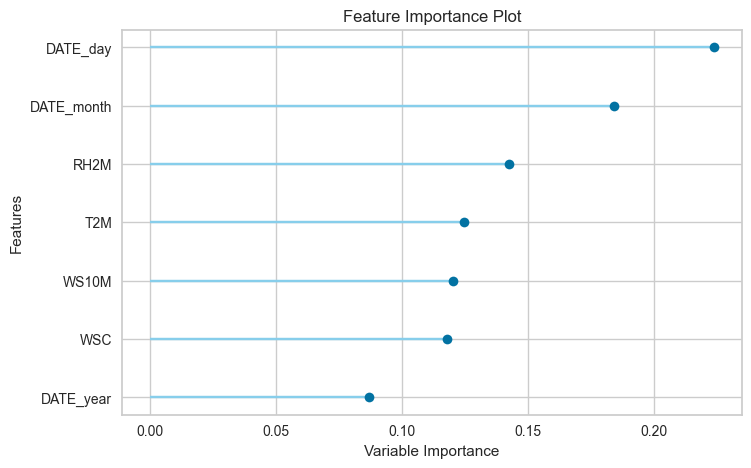

In [20]:
s.plot_model(best_model,plot = "feature")

In [6]:
predict_test_data =  s.predict_model(best_model)
predict_test_data

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.7816,8.2193,2.8669,0.6254,0.5472,6.9111


,T2M,RH2M,WS10M,WSC,DATE,PRECTOTCORR,prediction_label
7306,23.410000,96.089996,2.15,1.73,2022-03-10 05:00:00,0.120000,0.3317
15960,26.090000,93.769997,1.88,1.46,2023-05-03 01:00:00,19.059999,13.1897
19594,25.940001,92.070000,1.29,0.99,2023-10-28 02:00:00,13.430000,7.5266
20404,27.700001,85.570000,1.92,1.25,2023-12-11 08:00:00,0.530000,2.8287
23047,26.360001,87.360001,1.97,1.61,2024-04-11 02:00:00,0.000000,0.0484
...,...,...,...,...,...,...,...
15942,26.700001,92.709999,1.97,1.76,2023-05-01 22:00:00,2.930000,6.5444
22336,28.870001,72.690002,1.88,1.20,2024-03-09 08:00:00,0.580000,0.5458
11520,24.660000,95.599998,3.06,2.03,2022-09-28 07:00:00,14.830000,7.9343
15751,27.110001,90.410004,2.39,2.05,2023-04-23 21:00:00,0.720000,1.4338


In [7]:
print("predict testset")
predict_test_data[['PRECTOTCORR','prediction_label']] # predict testset

predict testset


,PRECTOTCORR,prediction_label
7306,0.120000,0.3317
15960,19.059999,13.1897
19594,13.430000,7.5266
20404,0.530000,2.8287
23047,0.000000,0.0484
...,...,...
15942,2.930000,6.5444
22336,0.580000,0.5458
11520,14.830000,7.9343
15751,0.720000,1.4338


In [14]:
new_data = data.copy().drop(['PRECTOTCORR'], axis=1)
predictions = s.predict_model(best_model,data = new_data)
print("****predict_alldata****")
predictions

****predict_alldata****


,T2M,RH2M,WS10M,WSC,DATE,prediction_label
0,23.510000,92.910004,1.94,1.28,2021-03-16 00:00:00,0.0000
1,23.309999,93.300003,1.69,1.14,2021-03-16 01:00:00,0.0000
2,23.080000,93.989998,1.57,1.07,2021-03-16 02:00:00,0.0000
3,22.820000,94.889999,1.62,1.10,2021-03-16 03:00:00,0.0000
4,22.540001,96.129997,1.76,1.22,2021-03-16 04:00:00,0.0000
...,...,...,...,...,...,...
29816,25.870001,90.320000,1.96,1.67,2025-03-13 19:00:00,0.5897
29817,25.530001,90.779999,1.90,1.48,2025-03-13 20:00:00,1.1200
29818,25.299999,91.080002,1.83,1.38,2025-03-13 21:00:00,0.0600
29819,25.190001,90.620003,1.68,1.22,2025-03-13 22:00:00,0.0600


<Figure size 2000x600 with 0 Axes>

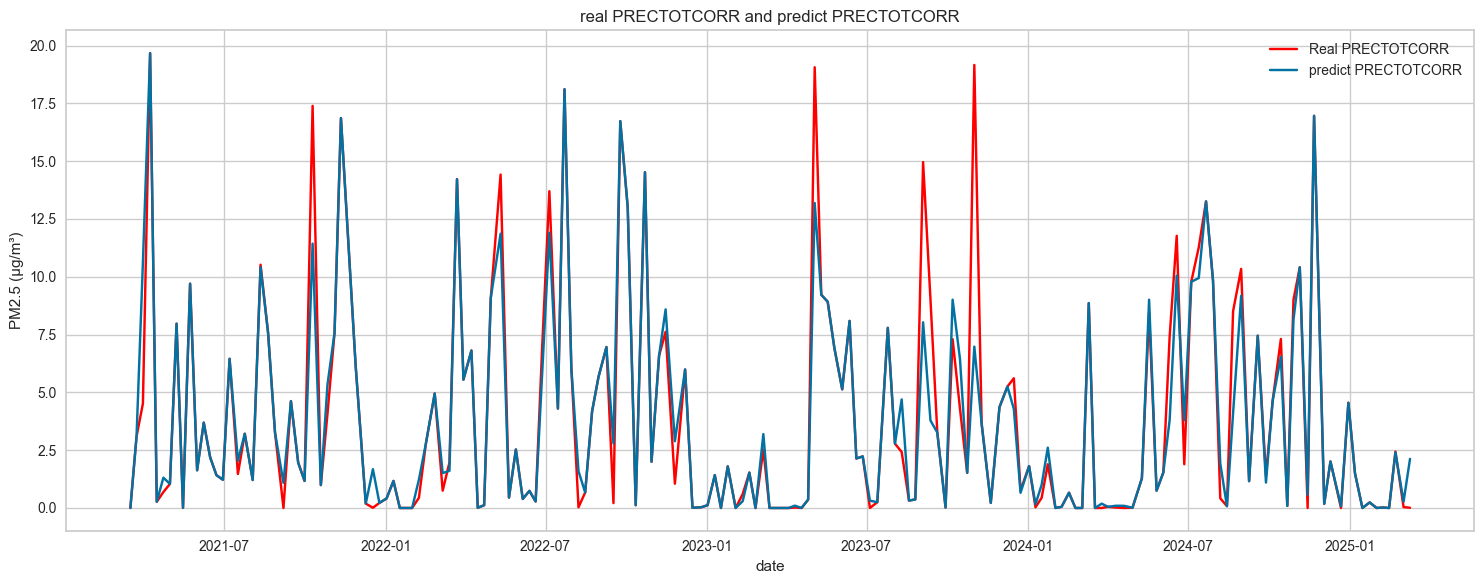

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sample_rate = 100  # แสดงทุกๆ 10 จุด


plt.figure(figsize=(15, 6))
plt.plot(data['DATE'][::168], data['PRECTOTCORR'][::168], label='Real PRECTOTCORR', color = 'red')
plt.plot(data['DATE'][::168], predictions['prediction_label'][::168], label='predict PRECTOTCORR', marker='x')
plt.title('real PRECTOTCORR and predict PRECTOTCORR')
plt.xlabel('date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
s.save_model(best_model, r'C:\Users\ASUS\Desktop\projectforecastpm2_5\models\rainny_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['DATE'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['T2M', 'RH2M', 'WS10M', 'WSC'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'C:\\Users\\ASUS\\Desktop\\projectforecastpm2_5\\models\\rainny_model.pkl')

In [10]:
!pip install numpy

In [12]:
from pycaret.regression import load_model, predict_model
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
data2_rain = pd.read_csv(r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\raw_data\raindata.csv")
data2_rain['DATE'] = pd.to_datetime(data2_rain['DATE'])
import pandas as pd
from datetime import timedelta
import random

def forecast_rainfall_next_7_days(model, user_input_features):
    """
    ทำนายปริมาณฝนสำหรับ 7 วันข้างหน้าโดยใช้ค่าที่ผู้ใช้กรอก
    """
    # สร้างรายการวันที่สำหรับ 7 วันข้างหน้า (ทุกชั่วโมง)
    last_date = data2_rain['DATE'].max()
    future_hours = [last_date + timedelta(hours=i+1) for i in range(7 * 24)]  # 7 วัน * 24 ชั่วโมง
    future_data = []
    
    # ใช้ค่าที่ผู้ใช้กรอก
    T2M = user_input_features.get('T2M', 25.0)
    RH2M = user_input_features.get('RH2M', 70.0)
    WS10M = user_input_features.get('WS10M', 5.0)
    WSC = user_input_features.get('WSC', 2.0)
    
    # ทำนายปริมาณฝนสำหรับแต่ละชั่วโมง
    for i, future_hour in enumerate(future_hours):
        # สุ่มค่าของ feature แต่ละตัวให้แตกต่างกันในแต่ละวัน
        day_offset = (i // 24) + 1  # คำนวณวันที่ (1-7)
        
        new_row = {
            'DATE': future_hour,
            'T2M': max(0, T2M + random.uniform(-1, 1) * day_offset),  # สุ่มค่า T2M และป้องกันค่าติดลบ
            'RH2M': max(0, RH2M + random.uniform(-2, 2) * day_offset),  # สุ่มค่า RH2M และป้องกันค่าติดลบ
            'WS10M': max(0, WS10M + random.uniform(-0.5, 0.5) * day_offset),  # สุ่มค่า WS10M และป้องกันค่าติดลบ
            'WSC': max(0, WSC + random.uniform(-0.2, 0.2) * day_offset),  # สุ่มค่า WSC และป้องกันค่าติดลบ
        }
        
        # ทำนายปริมาณฝน
        prediction_df = pd.DataFrame([new_row])
        rainfall_prediction = predict_model(model, data=prediction_df)
        new_row['PRECTOTCORR'] = rainfall_prediction['prediction_label'].iloc[0]
        
        # ทำให้ค่าเป็นบวกเสมอ
        new_row['PRECTOTCORR'] = max(0, new_row['PRECTOTCORR'])
        
        future_data.append(new_row)
    
    return pd.DataFrame(future_data)

# ตัวอย่างการใช้งาน
x = {'T2M': 25, 'RH2M': 70, 'WS10M': 5, 'WSC': 2}
model_rainfall = load_model(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\models\rainny_model')
forecast_result = forecast_rainfall_next_7_days(model_rainfall, x)
print(forecast_result)

Transformation Pipeline and Model Successfully Loaded
                   DATE        T2M       RH2M     WS10M       WSC  PRECTOTCORR
0   2025-03-14 00:00:00  25.963939  68.334760  5.125367  1.801817       6.3068
1   2025-03-14 01:00:00  25.252634  69.952693  4.643702  2.153328       8.3100
2   2025-03-14 02:00:00  24.445257  71.921669  5.316623  2.024295       8.4218
3   2025-03-14 03:00:00  25.827870  71.833149  5.249794  1.916110       8.1715
4   2025-03-14 04:00:00  24.739409  69.562688  4.669048  1.942258       6.3298
..                  ...        ...        ...       ...       ...          ...
163 2025-03-20 19:00:00  27.397127  68.581247  2.747300  1.198680       4.0846
164 2025-03-20 20:00:00  18.394153  77.227117  6.787630  0.718775       5.9354
165 2025-03-20 21:00:00  24.371041  57.089790  3.555418  1.162017       3.0724
166 2025-03-20 22:00:00  30.506321  66.803721  3.734807  3.033809       7.5475
167 2025-03-20 23:00:00  29.584412  74.797937  6.727206  1.370272       9.741

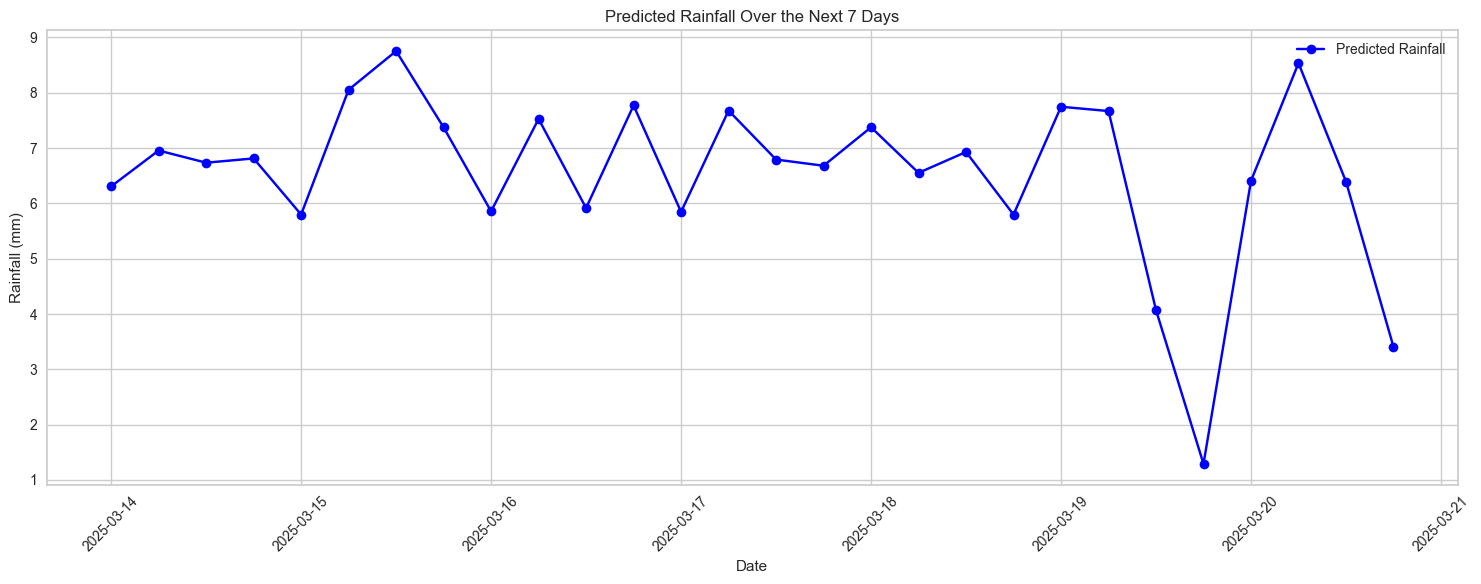

In [13]:
import matplotlib.pyplot as plt

# กำหนดขนาดของกราฟ
plt.figure(figsize=(15, 6))

# ตั้งค่า sample_rate เพื่อลดจำนวนจุดที่แสดง (แสดงทุกๆ 6 ชั่วโมง)
sample_rate = 6  

# Plot ค่าพยากรณ์ปริมาณฝน
plt.plot(forecast_result['DATE'][::sample_rate], forecast_result['PRECTOTCORR'][::sample_rate], 
         label='Predicted Rainfall', marker='o', linestyle='-', color='blue')

# ตั้งค่าชื่อกราฟและแกน
plt.title('Predicted Rainfall Over the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')

# แสดงคำอธิบายเส้นกราฟ
plt.legend()

# เพิ่มเส้นกริดให้กราฟ
plt.grid(True)

# จัด layout ให้เหมาะสม
plt.xticks(rotation=45)  # หมุนวันที่ให้ดูง่ายขึ้น
plt.tight_layout()

# แสดงกราฟ
plt.show()
